In [1]:
import sys
import os
import tensorflow as tf

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

2025-04-01 21:00:15.635056: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 21:00:18.005268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743534018.805857   35595 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743534019.022898   35595 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743534020.981851   35595 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
from src.data import check_gpu, load_speech_commands, prepare_datasets, inspect_dataset, get_dataset_classes, visualize_dataset, visualize_single_example

device_name = check_gpu()
train_ds, val_ds, test_ds, train_info, val_info, test_info = load_speech_commands()
class_names, labels = get_dataset_classes(train_ds, train_info)

I0000 00:00:1743534060.833447   35595 gpu_device.cc:2019] Created device /device:GPU:0 with 13499 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9
INFO:root:Found GPU at: /device:GPU:0
INFO:root:Loading speech_commands dataset...
INFO:absl:Load dataset info from /home/andre/tensorflow_datasets/speech_commands/0.0.3
INFO:absl:Creating a tf.data.Dataset reading 64 files located in folders: /home/andre/tensorflow_datasets/speech_commands/0.0.3.
I0000 00:00:1743534066.425537   35595 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13499 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9
INFO:absl:Constructing tf.data.Dataset speech_commands for split train, from /home/andre/tensorflow_datasets/speech_commands/0.0.3
INFO:absl:Load dataset info from /home/andre/tensorflow_datasets/speech_commands/0.0.3
INFO:absl:Creating a tf.data.D

In [3]:
print(f"Target classes: {class_names}")

Target classes: ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes', '_silence_', '_unknown_']


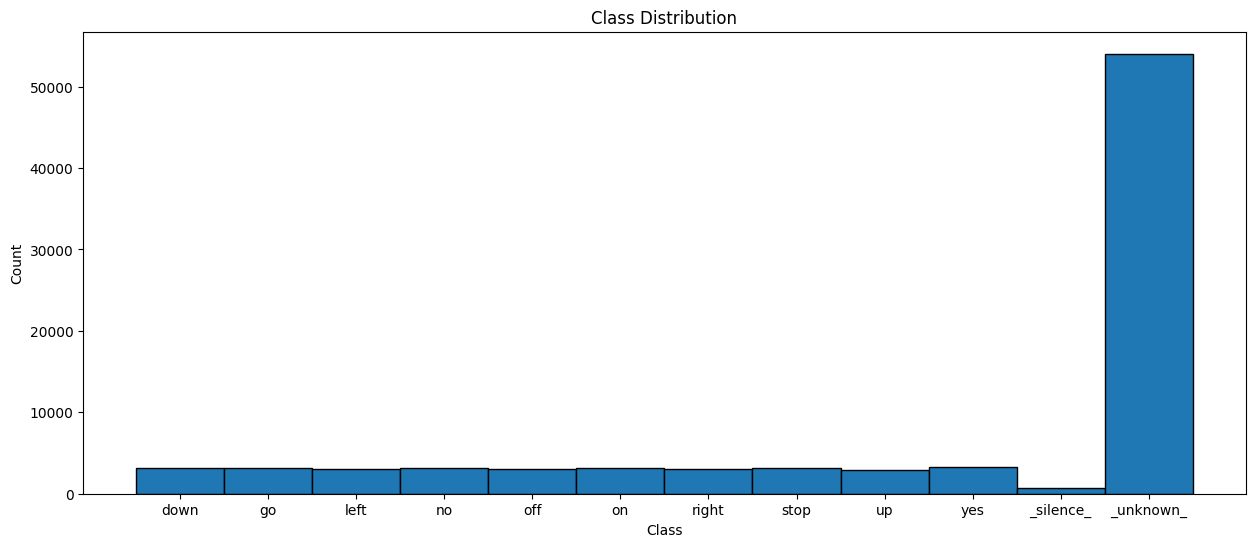

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n_classes = len(class_names)
bin_edges = np.arange(-0.5, n_classes)

plt.figure(figsize=(15, 6))
plt.hist(labels, bins=bin_edges, edgecolor='black')
plt.xticks(ticks=range(len(class_names)), labels=class_names, ha='center')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [5]:
target_classes = ['left', 'right', 'up', 'down']
ignored_classes = [cls for cls in class_names if cls not in target_classes and (cls != '_unknown_' or cls != '_silence_')]

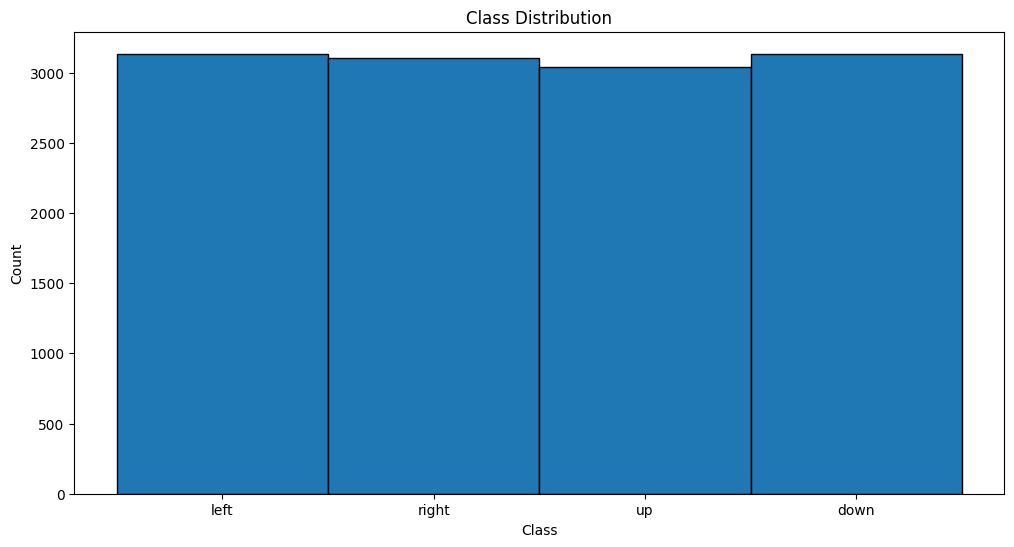

In [6]:
n_classes = len(target_classes)
bin_edges = np.arange(-0.5, n_classes)

plt.figure(figsize=(12, 6))
plt.hist(labels, bins=bin_edges, edgecolor='black')
plt.xticks(ticks=range(len(target_classes)), labels=target_classes, ha='center')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [7]:
train_prepared_ds, val_prepared_ds, test_prepared_ds = prepare_datasets(train_ds, val_ds, test_ds, target_classes, class_names)

INFO:root:Preparing datasets with target classes: ['left', 'right', 'up', 'down']
INFO:root:Preprocessing dataset...
INFO:root:Preprocessing dataset...
INFO:root:Preprocessing dataset...
INFO:root:Datasets prepared successfully


2025-04-01 21:01:30.939102: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


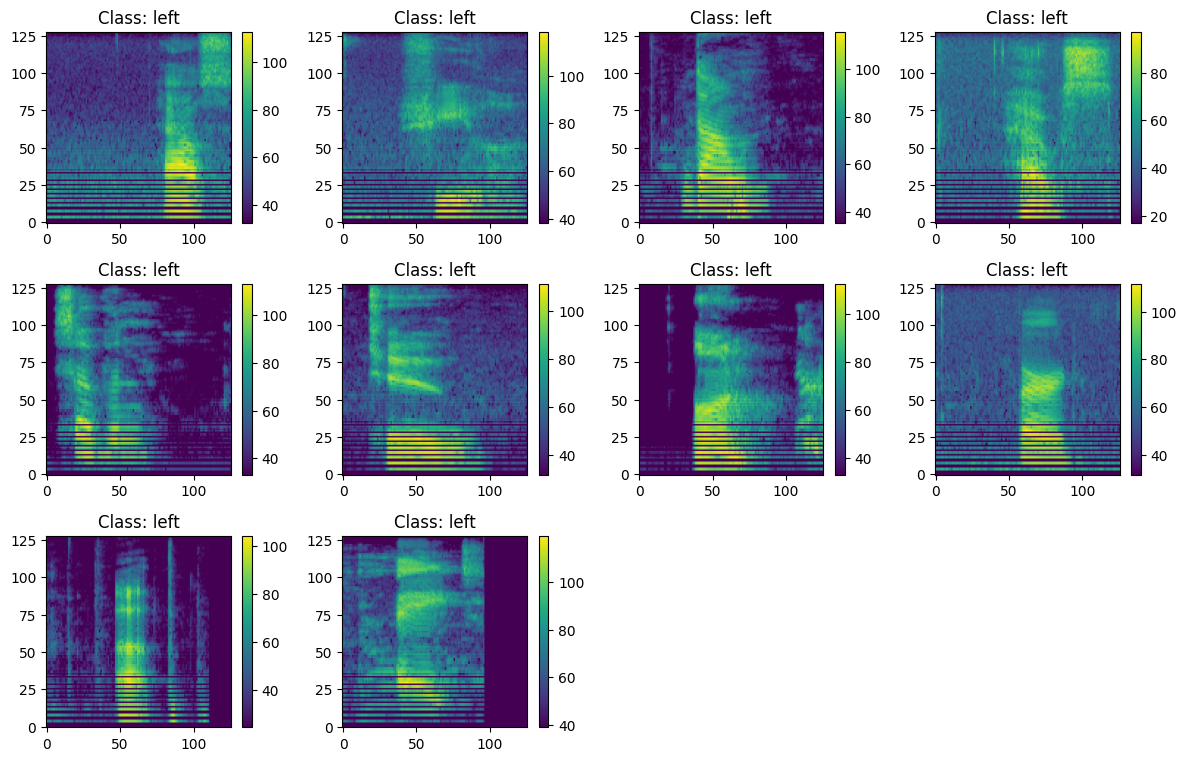

In [12]:
visualize_dataset(train_prepared_ds, target_classes)